In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantbullet as qb

cpi = pd.read_csv('./CPI.dat.csv')
ip = pd.read_csv('./IP.dat.csv')

cpi = np.log(cpi.iloc[769:900]["CPI"])
ip = np.log(ip.iloc[697:828]["IP"])

cpi_diff = cpi.diff().dropna().reset_index(drop=True)
ip_diff = ip.diff().dropna().reset_index(drop=True)

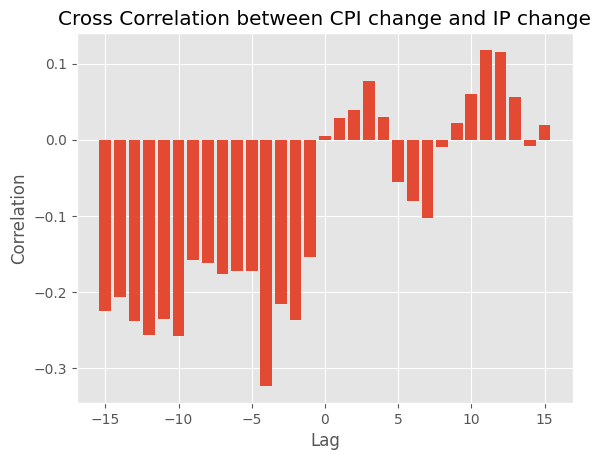

In [2]:
with plt.style.context('ggplot'):
    corr = qb.utils.cross_correlation(cpi_diff, ip_diff, 15)
    plt.bar(x = corr.index, height=corr.values)
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.title('Cross Correlation between CPI change and IP change')

In [3]:
df = pd.DataFrame({'CPI': cpi_diff, 'IP': ip_diff})
var_model = qb.tsa.VectorAutoRegression()
var_model.fit(df, 1)

In [4]:
var_model.results.coefficients

array([[ 0.78394978,  0.00957706],
       [-0.36756502,  0.30408546]])

In [5]:
var_model.results.sigma

array([[5.34310279e-06, 3.82097767e-06],
       [3.82097767e-06, 6.67272762e-05]])